In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Crime_Incidents_20250203.csv")
df = pd.DataFrame(dataset)

In [3]:
df.describe()

,Incident ID,Hour of Day,updated_at
count,0.0,318673.000000,0.0
mean,NaN,11.923122,NaN
std,NaN,7.194647,NaN
min,NaN,0.000000,NaN
25%,NaN,6.000000,NaN
50%,NaN,13.000000,NaN
75%,NaN,18.000000,NaN
max,NaN,23.000000,NaN


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318673 entries, 0 to 318672
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Case Number              318673 non-null  object 
 1   Incident Datetime        318673 non-null  object 
 2   Incident ID              0 non-null       float64
 3   Incident Type Primary    318673 non-null  object 
 4   Incident Description     318673 non-null  object 
 5   Parent Incident Type     318673 non-null  object 
 6   Hour of Day              318673 non-null  int64  
 7   Day of Week              318673 non-null  object 
 8   Address                  318635 non-null  object 
 9   City                     318673 non-null  object 
 10  State                    318673 non-null  object 
 11  Location                 312119 non-null  object 
 12  Latitude                 317398 non-null  object 
 13  Longitude                317398 non-null  object 
 14  Crea

,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Block Group,Census Block,2010 Census Tract,2010 Census Block Group,2010 Census Block,Police District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,16-1660403,06/14/2016 01:20:00 AM,NaN,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,...,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003
1,16-3480266,12/13/2016 05:00:00 AM,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,...,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001
2,20-2010167,07/19/2020 03:09:00 AM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,14-3210732,11/17/2014 08:08:00 AM,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007
4,15-1100268,04/20/2015 10:22:00 AM,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007


Dropping empty columns<br>
Columns - "Incident ID" and "updated_at"

In [5]:
df = df.drop(columns=['Incident ID', 'updated_at'])

Removing duplicate entries

In [6]:
df = df.drop_duplicates()

Handling mismatched string formats

In [7]:
# Converting data types of 'Longitude', 'Latitude', and 'zip_code'
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')
df['Census Tract'] = pd.to_numeric(df['Census Tract'], errors='coerce')
df['Census Block Group'] = pd.to_numeric(df['Census Block Group'], errors='coerce')
df['Census Block'] = pd.to_numeric(df['Census Block'], errors='coerce')

In [8]:
#Extracting month and year from 'Incident Datetime' and converting to integers
df['Year'] = pd.to_datetime(df['Incident Datetime']).dt.year
df['Month'] = pd.to_datetime(df['Incident Datetime']).dt.month

# Droping the 'Incident Datetime' column --> not required anymore
df = df.drop(columns=['Incident Datetime'])

In [9]:
# Converting 'Hour of Day' to integer
df['Hour of Day'] = df['Hour of Day'].astype(int)

In [10]:
# Converting 'Day of Week' to integers (1-7, assuming Monday=1, etc.)
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['Day of Week'] = df['Day of Week'].map(day_mapping)

In [11]:
# Dropping 'Incident Description' and 'Parent Incident Type' --> highly correlated to Incident Type
df = df.drop(columns=['Incident Description', 'Parent Incident Type'])

In [12]:
# Dropping column "Created At" as it has approx 70% null values
# Dropping case number, city, state and others as they are irrelevant for our model

df = df.drop(columns=["Created At","City","State","Case Number","GEOID20_block","GEOID20_blockgroup","GEOID20_tract","TRACTCE20","Location",'Council District 2011'])
df = df.drop(columns=["2010 Census Block Group","2010 Census Block"])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318673 entries, 0 to 318672
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  318673 non-null  object 
 1   Hour of Day            318673 non-null  int64  
 2   Day of Week            318673 non-null  int64  
 3   Address                318635 non-null  object 
 4   Latitude               312119 non-null  float64
 5   Longitude              312119 non-null  float64
 6   zip_code               314739 non-null  float64
 7   neighborhood           315050 non-null  object 
 8   Council District       315954 non-null  object 
 9   Census Tract           312131 non-null  float64
 10  Census Block Group     312131 non-null  float64
 11  Census Block           312131 non-null  float64
 12  2010 Census Tract      315050 non-null  object 
 13  Police District        315050 non-null  object 
 14  Year                   318673 non-nu

In [14]:
# Adding new feature

def part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Part of Day'] = df['Hour of Day'].apply(part_of_day)


calculating the number of null values for each column

In [15]:
df.isnull().sum()

Incident Type Primary       0
Hour of Day                 0
Day of Week                 0
Address                    38
Latitude                 6554
Longitude                6554
zip_code                 3934
neighborhood             3623
Council District         2719
Census Tract             6542
Census Block Group       6542
Census Block             6542
2010 Census Tract        3623
Police District          3623
Year                        0
Month                       0
Part of Day                 0
dtype: int64

In [16]:
# Removing rows where any column has the value "UNKNOWN"
df = df[~df.isin(["UNKNOWN"]).any(axis=1)]
df = df[~df.isin(["NaN"]).any(axis=1)]


print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 301992 entries, 0 to 318672
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  301992 non-null  object 
 1   Hour of Day            301992 non-null  int64  
 2   Day of Week            301992 non-null  int64  
 3   Address                301955 non-null  object 
 4   Latitude               297941 non-null  float64
 5   Longitude              297941 non-null  float64
 6   zip_code               299133 non-null  float64
 7   neighborhood           298369 non-null  object 
 8   Council District       300009 non-null  object 
 9   Census Tract           298369 non-null  float64
 10  Census Block Group     298369 non-null  float64
 11  Census Block           298369 non-null  float64
 12  2010 Census Tract      298369 non-null  object 
 13  Police District        298369 non-null  object 
 14  Year                   301992 non-null  i

In [70]:
# Running KMeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])


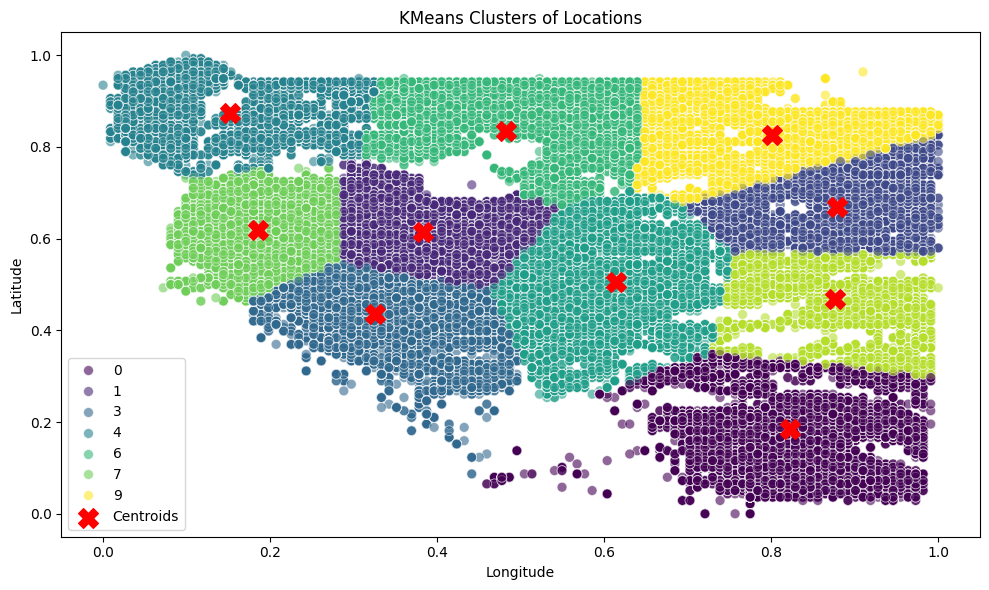

In [71]:

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    hue='LocationCluster', 
    palette='viridis', 
    data=df, 
    alpha=0.6, 
    s=50
)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 1],  # Longitude
    centroids[:, 0],  # Latitude
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title('KMeans Clusters of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
#Filling null values of latitude and longitude using neighborhood data

df['Latitude'] = df.groupby('neighborhood')['Latitude'].transform(lambda x: x.fillna(x.mean()))
df['Longitude'] = df.groupby('neighborhood')['Longitude'].transform(lambda x: x.fillna(x.mean()))

In [17]:
# Dropping rows with missing entries

df = df.dropna()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 297014 entries, 0 to 318672
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  297014 non-null  object 
 1   Hour of Day            297014 non-null  int64  
 2   Day of Week            297014 non-null  int64  
 3   Address                297014 non-null  object 
 4   Latitude               297014 non-null  float64
 5   Longitude              297014 non-null  float64
 6   zip_code               297014 non-null  float64
 7   neighborhood           297014 non-null  object 
 8   Council District       297014 non-null  object 
 9   Census Tract           297014 non-null  float64
 10  Census Block Group     297014 non-null  float64
 11  Census Block           297014 non-null  float64
 12  2010 Census Tract      297014 non-null  object 
 13  Police District        297014 non-null  object 
 14  Year                   297014 non-null  i

In [21]:
df.head()

,Incident Type Primary,Hour of Day,Day of Week,Address,Latitude,Longitude,zip_code,neighborhood,Council District,Census Tract,Census Block Group,Census Block,2010 Census Tract,Police District,Year,Month,Part of Day,LocationCluster
0,ASSAULT,1,2,E AMHERST ST & E AMHERST ST,42.938,-78.889,14207.0,Grant-Amherst,NORTH,55.00,2.0,2003.0,55,District D,2016,6,Night,7
1,LARCENY/THEFT,5,2,1000 Block E LOVEJOY ST,42.889,-78.809,14206.0,Lovejoy,LOVEJOY,23.00,4.0,4001.0,23,District C,2016,12,Night,3
3,LARCENY/THEFT,8,1,2100 Block ELMWOOD AV,42.954,-78.879,14207.0,West Hertel,NORTH,56.00,2.0,2007.0,56,District D,2014,11,Morning,1
4,LARCENY/THEFT,10,1,2100 Block ELMWOOD AV,42.954,-78.879,14207.0,West Hertel,NORTH,56.00,2.0,2007.0,56,District D,2015,4,Morning,1
5,BURGLARY,3,5,400 Block GLENWOOD AV,42.913,-78.848,14208.0,Masten Park,MASTEN,33.02,3.0,3009.0,33.02,District C,2015,4,Night,8


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297014 entries, 0 to 318672
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  297014 non-null  object 
 1   Hour of Day            297014 non-null  int64  
 2   Day of Week            297014 non-null  int64  
 3   Address                297014 non-null  object 
 4   Latitude               297014 non-null  float64
 5   Longitude              297014 non-null  float64
 6   zip_code               297014 non-null  float64
 7   neighborhood           297014 non-null  object 
 8   Council District       297014 non-null  object 
 9   Census Tract           297014 non-null  float64
 10  Census Block Group     297014 non-null  float64
 11  Census Block           297014 non-null  float64
 12  2010 Census Tract      297014 non-null  object 
 13  Police District        297014 non-null  object 
 14  Year                   297014 non-null  i

Examining Unique Values 

In [23]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Incident Type Primary,22
Hour of Day,24
Day of Week,7
Address,20836
Latitude,137
Longitude,112
zip_code,20
neighborhood,35
Council District,10
Census Tract,91


In [24]:
# Counting the number of incidents per Council District
incidents_by_district = df['Council District'].value_counts()

print(incidents_by_district)


Council District
FILLMORE      50575
ELLICOTT      42992
MASTEN        37489
NORTH         34002
LOVEJOY       32939
NIAGARA       30061
UNIVERSITY    29735
DELAWARE      19749
SOUTH         19375
UNNOWN           97
Name: count, dtype: int64


In [25]:
# Get the value counts for 'Incident Type Primary'
incident_type_counts = df['Incident Type Primary'].value_counts()
print(incident_type_counts)


Incident Type Primary
LARCENY/THEFT               128075
ASSAULT                      60128
BURGLARY                     54657
UUV                          26663
ROBBERY                      18614
RAPE                          2893
SEXUAL ABUSE                  2678
THEFT OF SERVICES             1901
MURDER                         942
AGGR ASSAULT                   120
Assault                        114
Breaking & Entering             83
CRIM NEGLIGENT HOMICIDE         70
Theft                           35
MANSLAUGHTER                    13
AGG ASSAULT ON P/OFFICER         9
Robbery                          6
Sexual Assault                   5
Theft of Vehicle                 4
Other Sexual Offense             2
SODOMY                           1
Homicide                         1
Name: count, dtype: int64


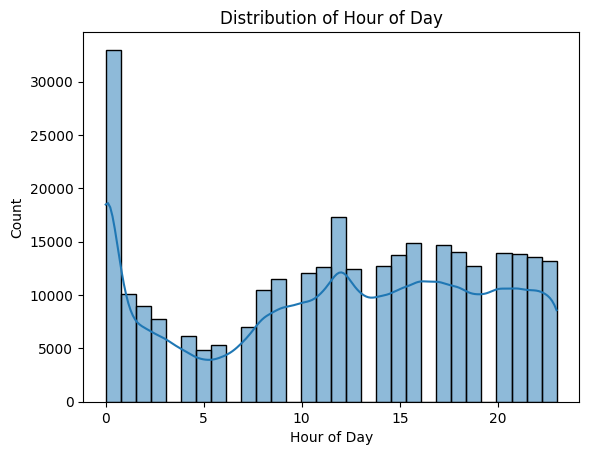

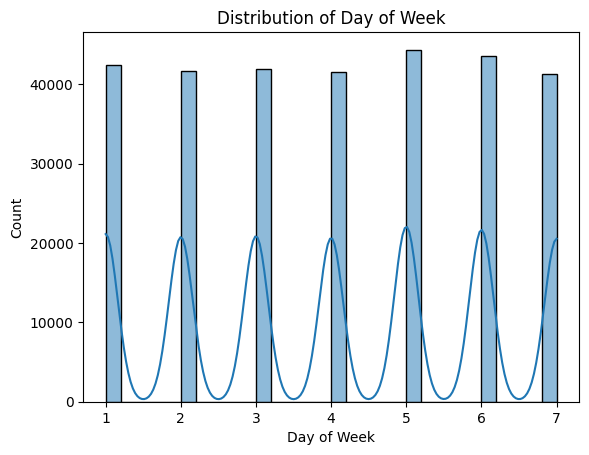

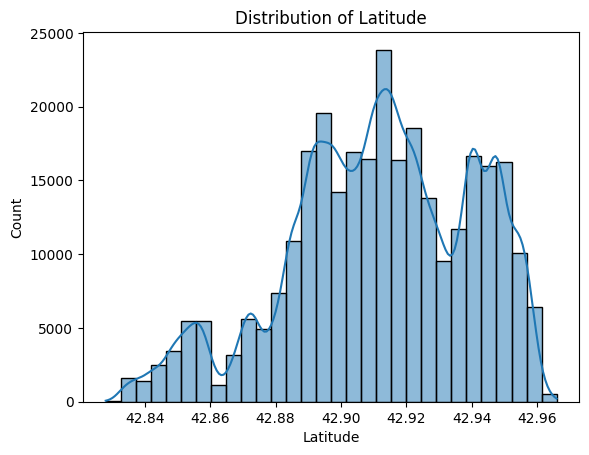

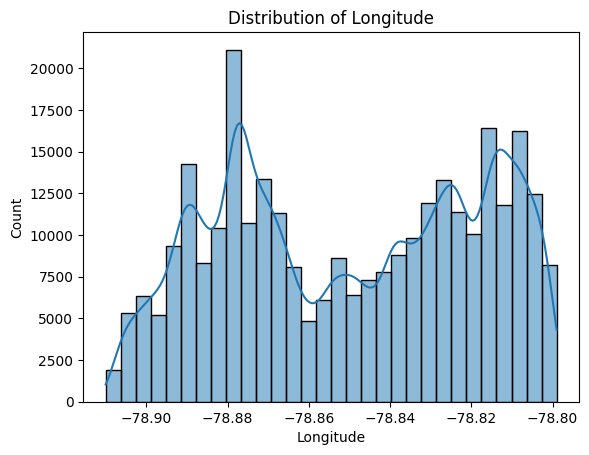

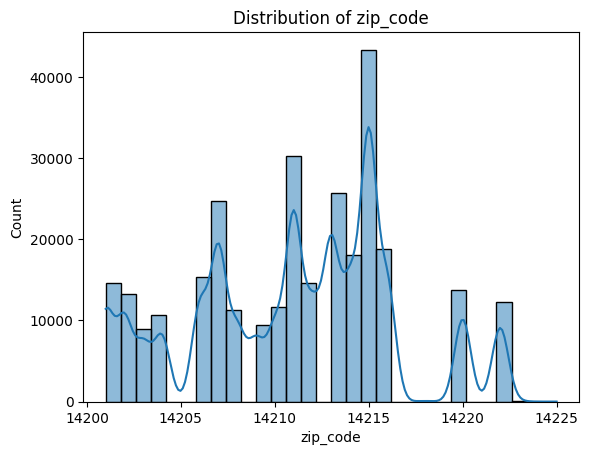

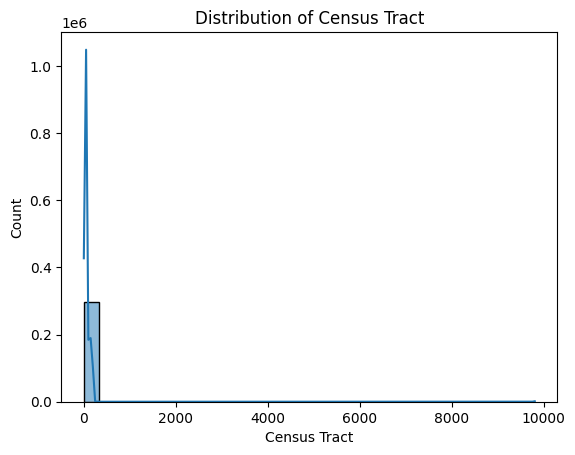

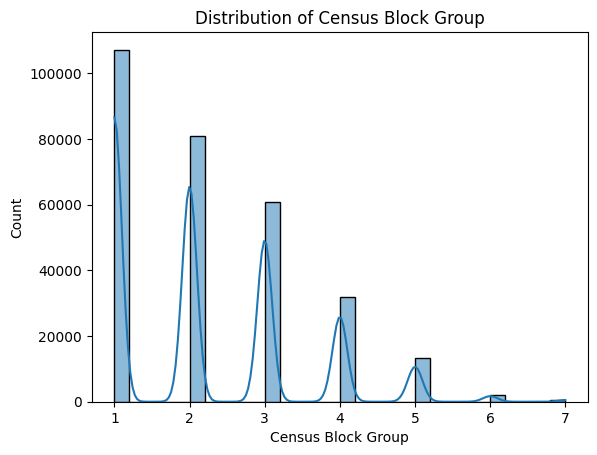

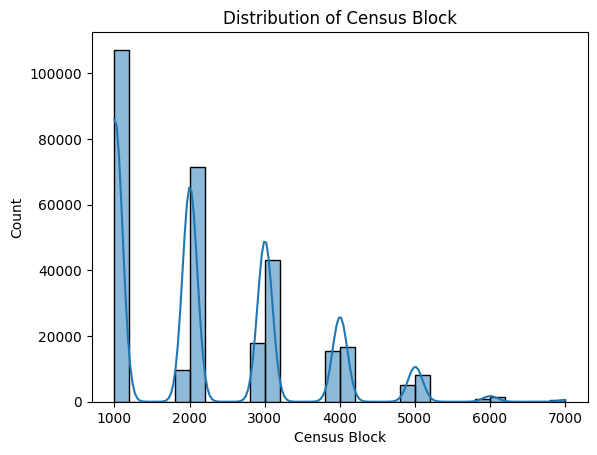

In [26]:
# distribution of numerical columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


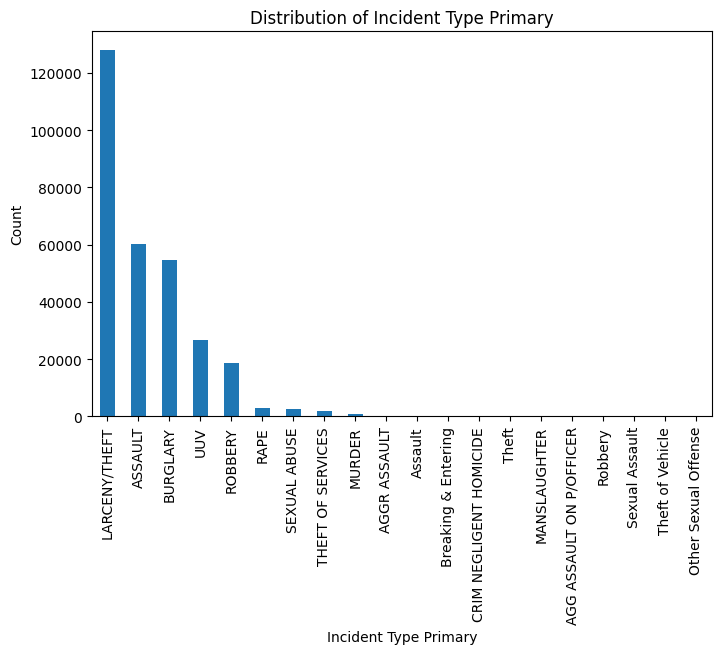

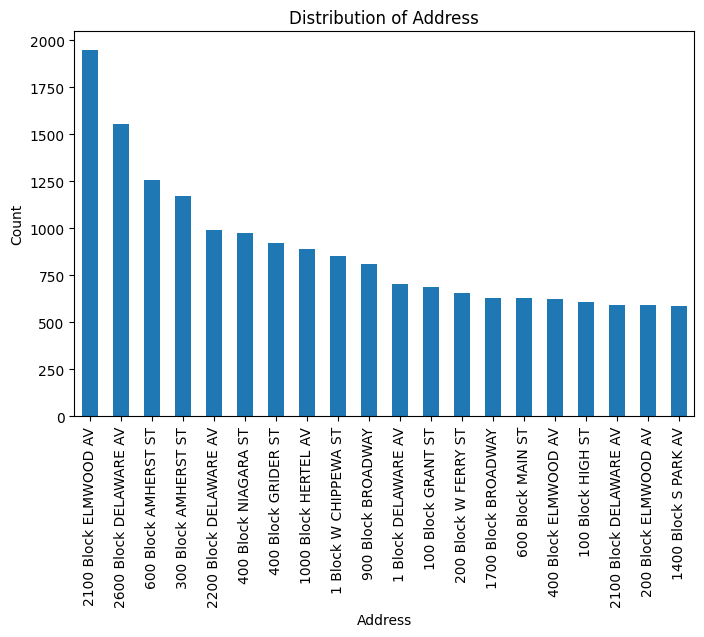

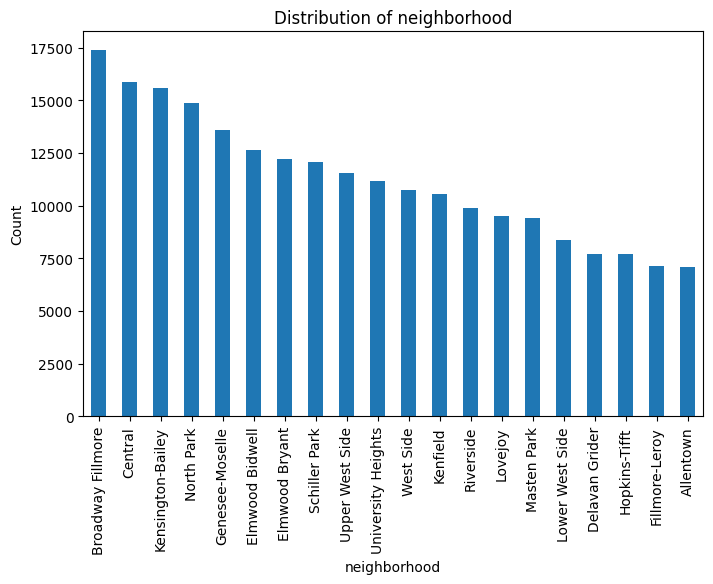

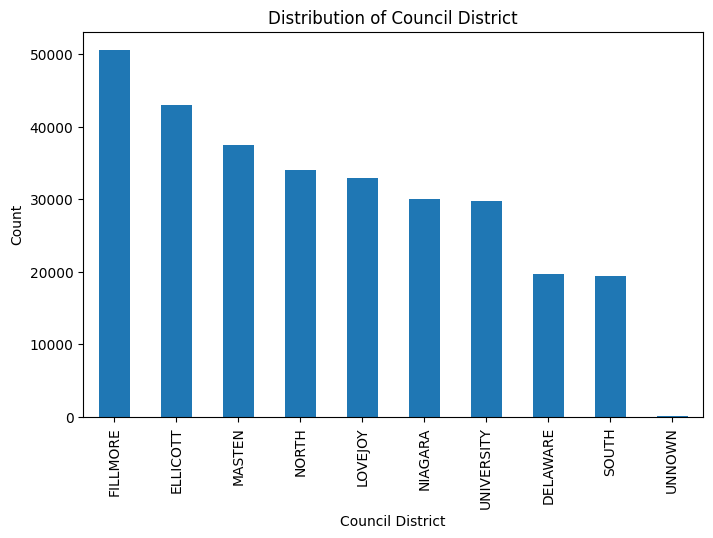

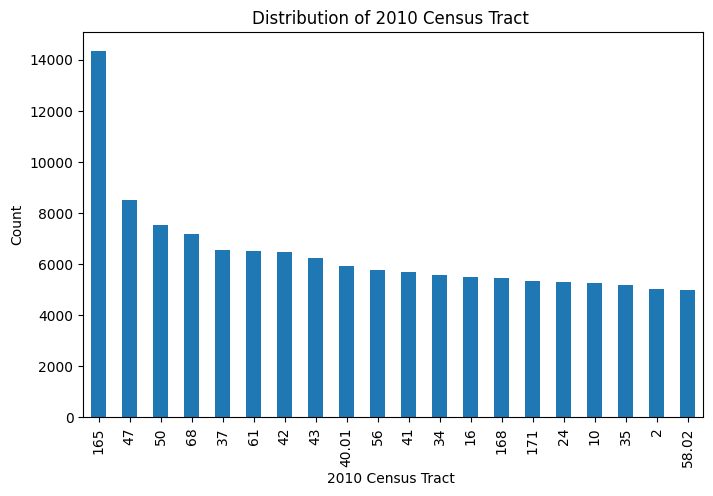

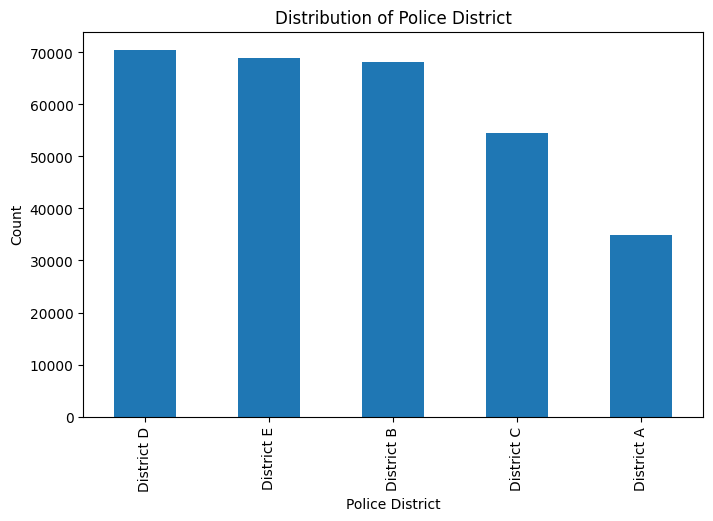

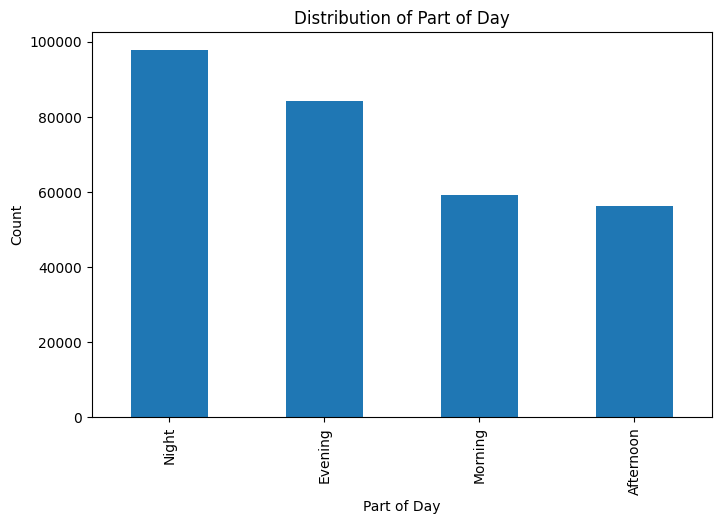

In [27]:
# Bar plot for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().head(20).plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')
    plt.show()


In [28]:

# Group by 'Hour of Day' and 'Incident Type Primary' and count occurrences
incident_by_hour = df.groupby(['Hour of Day', 'Incident Type Primary']).size().reset_index(name='Count')

# Sort values for better readability
incident_by_hour = incident_by_hour.sort_values(by=['Hour of Day', 'Count'], ascending=[True, False])
print(incident_by_hour)

pivot_table = incident_by_hour.pivot(index='Hour of Day', columns='Incident Type Primary', values='Count').fillna(0)
print(pivot_table)


     Hour of Day Incident Type Primary  Count
4              0         LARCENY/THEFT  16303
2              0              BURGLARY   5574
1              0               ASSAULT   5045
12             0                   UUV   2931
8              0               ROBBERY   1612
..           ...                   ...    ...
318           23                  RAPE    172
321           23     THEFT OF SERVICES    106
320           23          SEXUAL ABUSE     89
317           23                MURDER     61
313           23          AGGR ASSAULT      3

[323 rows x 3 columns]
Incident Type Primary  AGG ASSAULT ON P/OFFICER  AGGR ASSAULT  ASSAULT  \
Hour of Day                                                              
0                                           0.0          14.0   5045.0   
1                                           0.0           5.0   2997.0   
2                                           0.0           7.0   2835.0   
3                                           1.0       

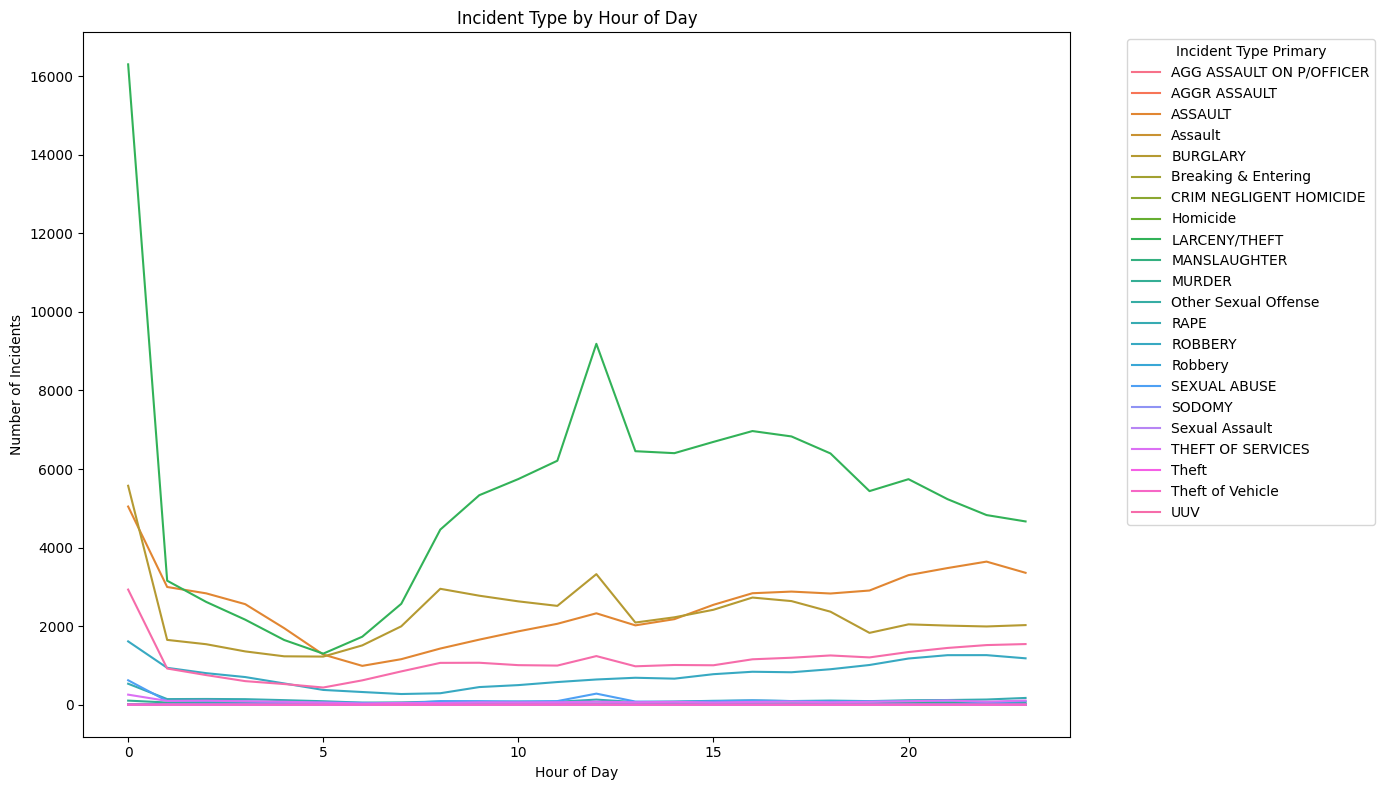

In [29]:

# top incident types across different hours
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_table, dashes=False)
plt.title("Incident Type by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Incidents")
plt.legend(title="Incident Type Primary", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297014 entries, 0 to 318672
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  297014 non-null  object 
 1   Hour of Day            297014 non-null  int64  
 2   Day of Week            297014 non-null  int64  
 3   Address                297014 non-null  object 
 4   Latitude               297014 non-null  float64
 5   Longitude              297014 non-null  float64
 6   zip_code               297014 non-null  float64
 7   neighborhood           297014 non-null  object 
 8   Council District       297014 non-null  object 
 9   Census Tract           297014 non-null  float64
 10  Census Block Group     297014 non-null  float64
 11  Census Block           297014 non-null  float64
 12  2010 Census Tract      297014 non-null  object 
 13  Police District        297014 non-null  object 
 14  Year                   297014 non-null  i

In [31]:
df.describe()

,Hour of Day,Day of Week,Latitude,Longitude,zip_code,Census Tract,Census Block Group,Census Block,Year,Month,LocationCluster
count,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000,297014.000000
mean,11.905382,4.008451,42.911723,-78.849840,14210.992738,70.006820,2.231518,2237.559846,2013.620718,6.808218,4.549314
std,7.274902,1.994915,0.028314,0.031294,5.389089,292.084581,1.228350,1227.033130,5.157585,3.309994,2.811064
min,0.000000,1.000000,42.828000,-78.910000,14201.000000,1.100000,1.000000,1000.000000,1910.000000,1.000000,0.000000
25%,6.000000,2.000000,42.893000,-78.878000,14207.000000,33.020000,1.000000,1007.000000,2009.000000,4.000000,2.000000
50%,13.000000,4.000000,42.913000,-78.849000,14211.000000,47.020000,2.000000,2004.000000,2013.000000,7.000000,5.000000
75%,18.000000,6.000000,42.935000,-78.821000,14215.000000,67.020000,3.000000,3004.000000,2018.000000,10.000000,7.000000
max,23.000000,7.000000,42.966000,-78.799000,14225.000000,9805.000000,7.000000,7005.000000,2025.000000,12.000000,9.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', alpha=0.5, data=df, hue='Incident Type Primary')
plt.title('Geographical Distribution of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


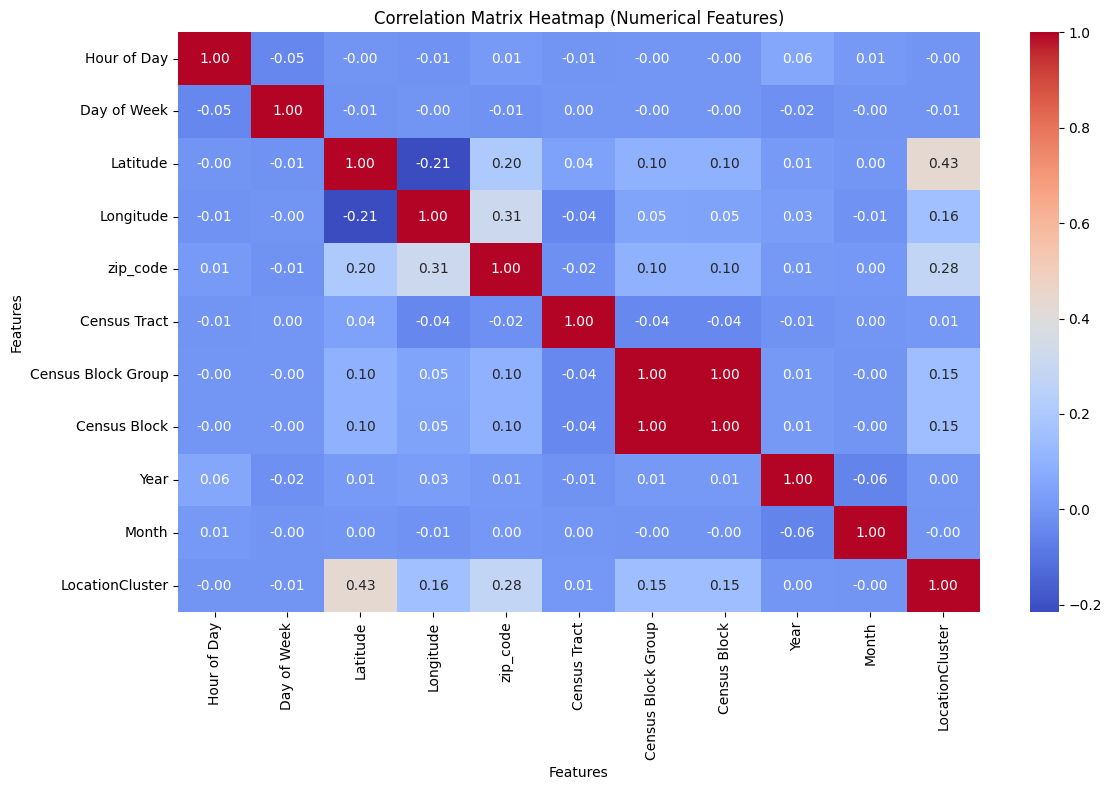

In [33]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


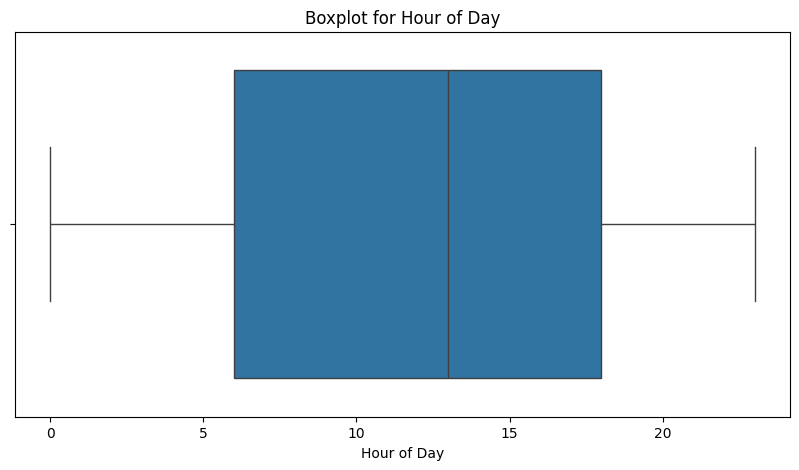

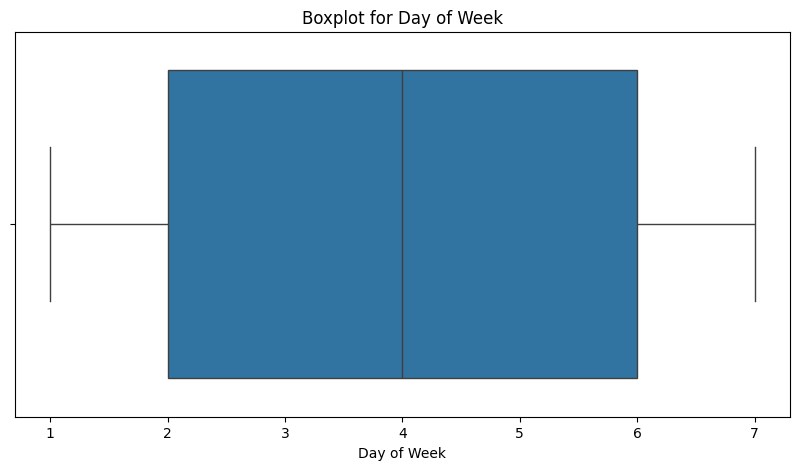

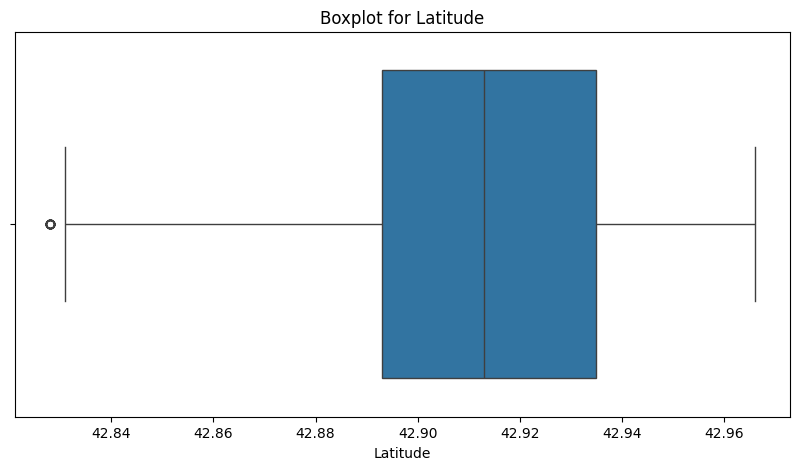

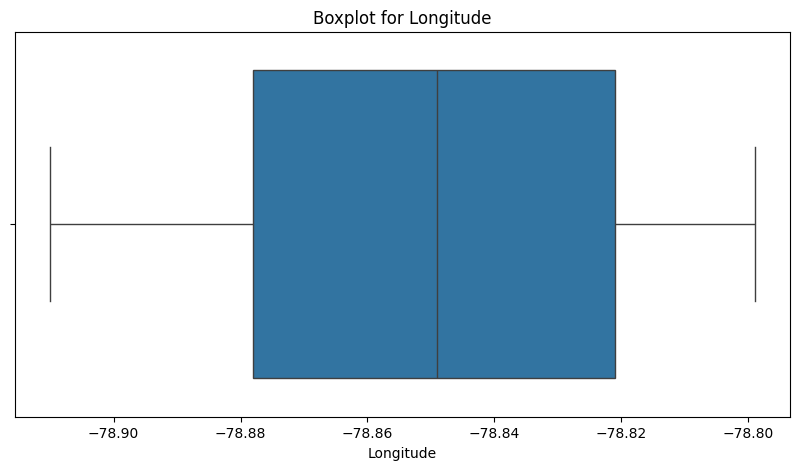

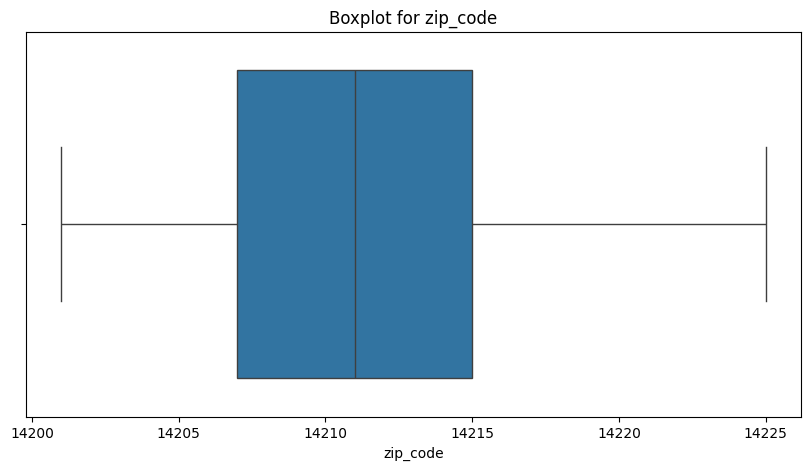

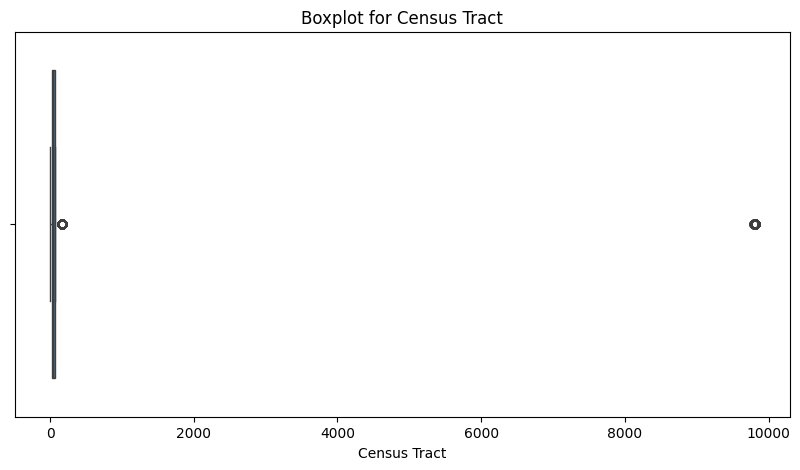

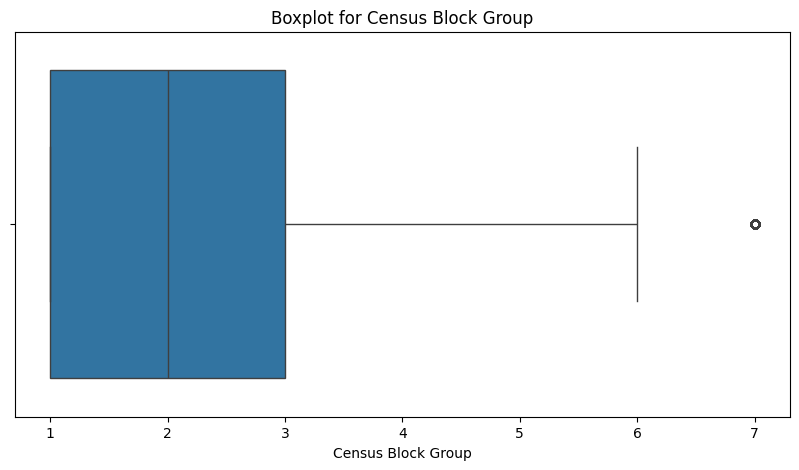

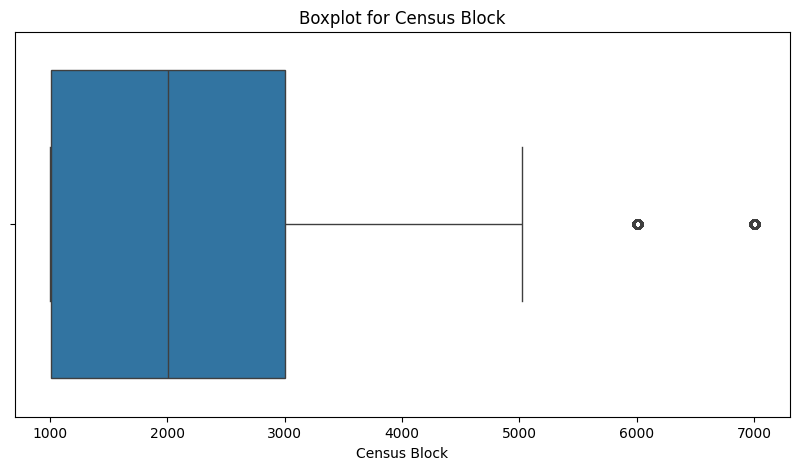

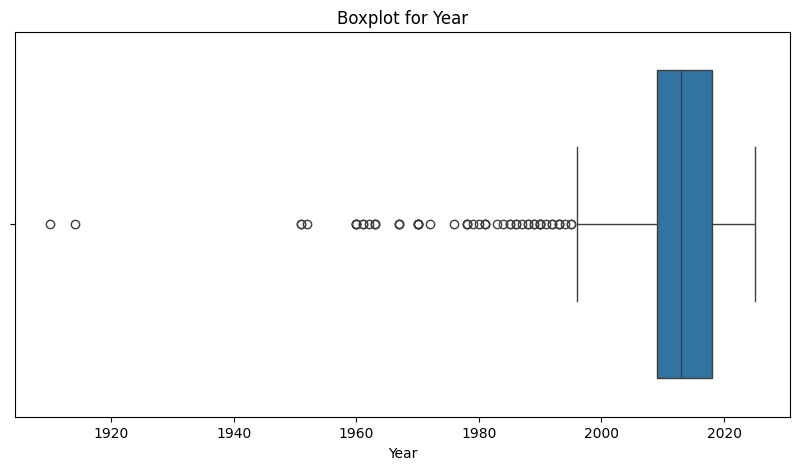

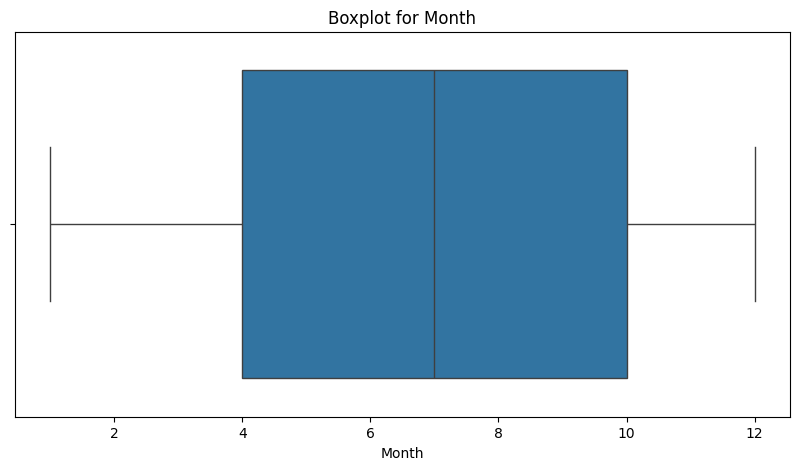

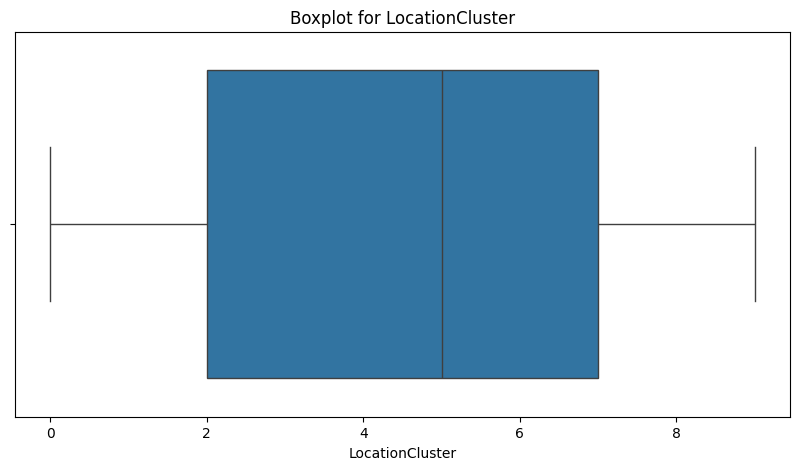

In [34]:

# Boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


Incidents based on clusters:
LocationCluster
0    24459
1    19860
2    42684
3    35136
4    26041
5    39935
6    24202
7    21635
8    27480
9    35582
Name: count, dtype: int64


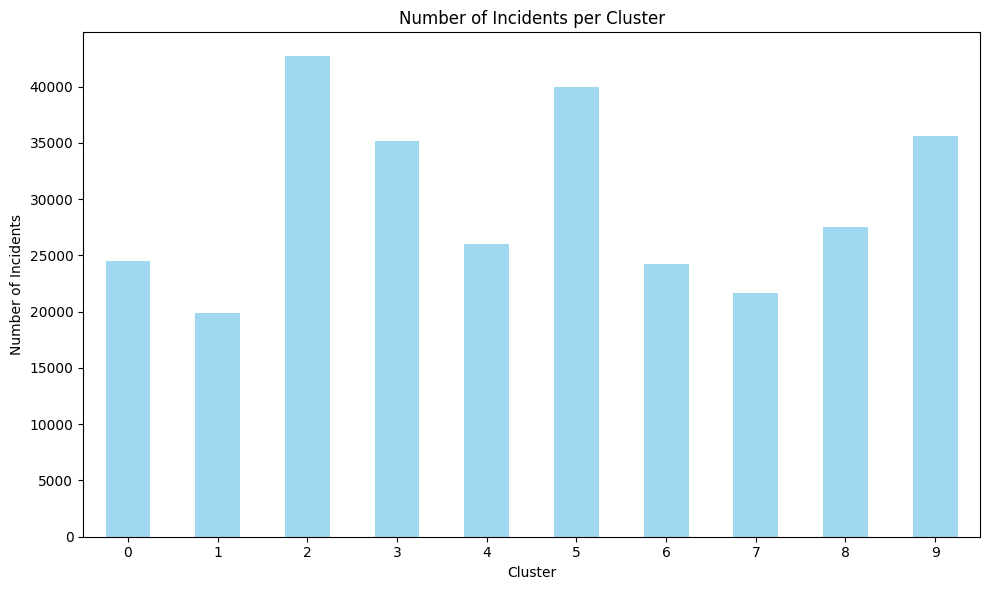

In [35]:
# Count the number of incidents in each cluster
cluster_incident_counts = df['LocationCluster'].value_counts().sort_index()
print("Incidents based on clusters:")
print(cluster_incident_counts)

# Bar plot of incidents per cluster
plt.figure(figsize=(10, 6))
cluster_incident_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Incidents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297014 entries, 0 to 318672
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  297014 non-null  object 
 1   Hour of Day            297014 non-null  int64  
 2   Day of Week            297014 non-null  int64  
 3   Address                297014 non-null  object 
 4   Latitude               297014 non-null  float64
 5   Longitude              297014 non-null  float64
 6   zip_code               297014 non-null  float64
 7   neighborhood           297014 non-null  object 
 8   Council District       297014 non-null  object 
 9   Census Tract           297014 non-null  float64
 10  Census Block Group     297014 non-null  float64
 11  Census Block           297014 non-null  float64
 12  2010 Census Tract      297014 non-null  object 
 13  Police District        297014 non-null  object 
 14  Year                   297014 non-null  i

In [37]:
# Filter the data for the year 2024
data_2024 = df[df['Year'] == 2024]

# Find the top 5 incident types with the highest numbers in 2024
top_5_incident_types = data_2024['Incident Type Primary'].value_counts().head(5).index

# Filter the dataset for only the top 5 incident types
data_top_5_incidents = data_2024[data_2024['Incident Type Primary'].isin(top_5_incident_types)]

# Group by zip code and incident type to count incidents
incidents_by_zipcode = data_top_5_incidents.groupby(['zip_code', 'Incident Type Primary']).size().reset_index(name='Incident Count')

# Pivot the result for better visualization
pivot_table = incidents_by_zipcode.pivot(index='zip_code', columns='Incident Type Primary', values='Incident Count').fillna(0)

# Display the pivot table
print(pivot_table)


Incident Type Primary  ASSAULT  BURGLARY  LARCENY/THEFT  ROBBERY    UUV
zip_code                                                               
14201.0                  132.0      55.0          388.0     20.0   92.0
14202.0                   70.0      27.0          173.0     13.0  111.0
14203.0                   72.0      17.0          145.0     12.0  115.0
14204.0                  114.0      39.0          278.0     12.0  101.0
14206.0                  165.0      92.0          363.0     19.0  130.0
14207.0                  186.0     118.0          656.0     49.0  173.0
14208.0                   92.0      63.0          141.0     15.0  117.0
14209.0                   50.0      47.0          188.0     14.0  129.0
14210.0                   98.0      61.0          190.0     18.0  104.0
14211.0                  278.0     138.0          507.0     60.0  230.0
14212.0                  111.0      58.0          220.0     35.0   76.0
14213.0                  174.0     155.0          507.0     34.0

In [38]:
df = df.drop(columns=['Census Block',])

In [39]:
# Normalising Latitude and Longitude

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
df[["Latitude", "Longitude"]] = scaler.fit_transform(df[["Latitude", "Longitude"]])


In [40]:
df.head()

,Incident Type Primary,Hour of Day,Day of Week,Address,Latitude,Longitude,zip_code,neighborhood,Council District,Census Tract,Census Block Group,2010 Census Tract,Police District,Year,Month,Part of Day,LocationCluster
0,ASSAULT,1,2,E AMHERST ST & E AMHERST ST,0.797101,0.189189,14207.0,Grant-Amherst,NORTH,55.00,2.0,55,District D,2016,6,Night,7
1,LARCENY/THEFT,5,2,1000 Block E LOVEJOY ST,0.442029,0.909910,14206.0,Lovejoy,LOVEJOY,23.00,4.0,23,District C,2016,12,Night,3
3,LARCENY/THEFT,8,1,2100 Block ELMWOOD AV,0.913043,0.279279,14207.0,West Hertel,NORTH,56.00,2.0,56,District D,2014,11,Morning,1
4,LARCENY/THEFT,10,1,2100 Block ELMWOOD AV,0.913043,0.279279,14207.0,West Hertel,NORTH,56.00,2.0,56,District D,2015,4,Morning,1
5,BURGLARY,3,5,400 Block GLENWOOD AV,0.615942,0.558559,14208.0,Masten Park,MASTEN,33.02,3.0,33.02,District C,2015,4,Night,8


In [41]:
df["Police District"].value_counts()

Police District
District D    70452
District E    68994
District B    68221
District C    54423
District A    34924
Name: count, dtype: int64

In [42]:
# Creating a mapping for Police District
district_mapping = {
    "District A": 1,
    "District B": 2,
    "District C": 3,
    "District D": 4,
    "District E": 5
}

# Mapping the values in the Police District column
df["Police District"] = df["Police District"].map(district_mapping)


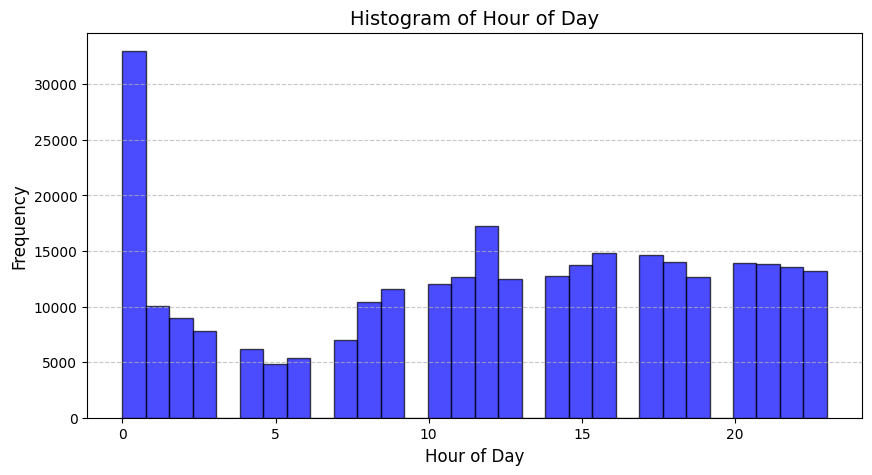

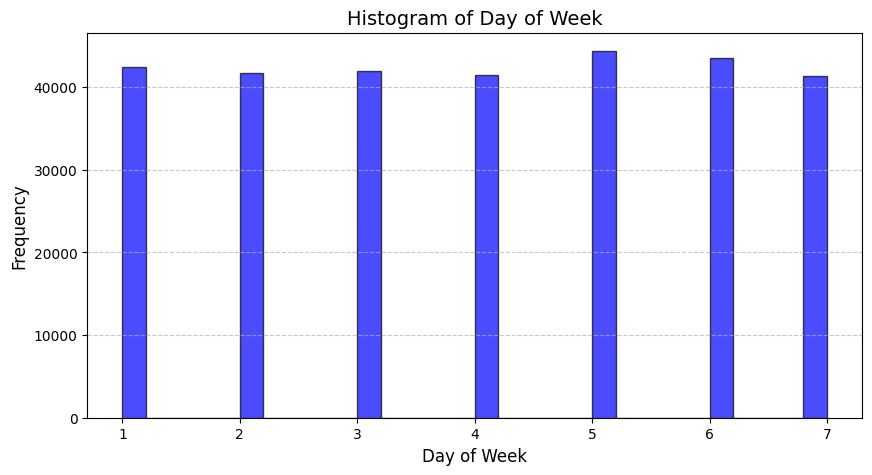

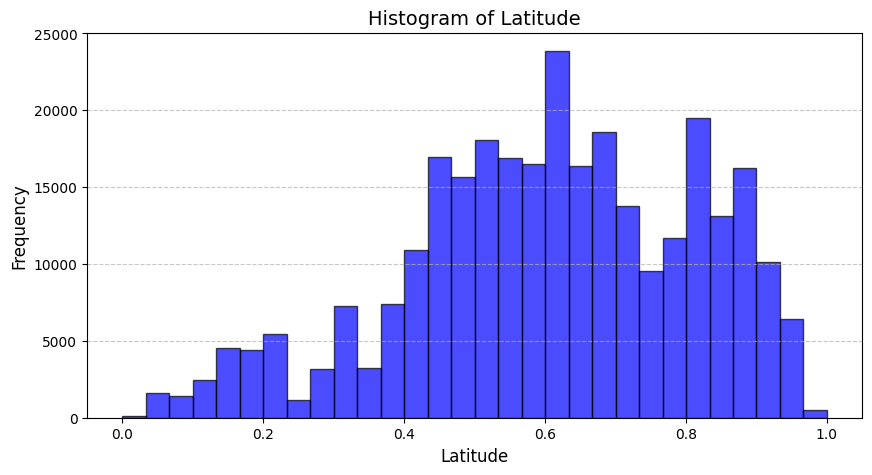

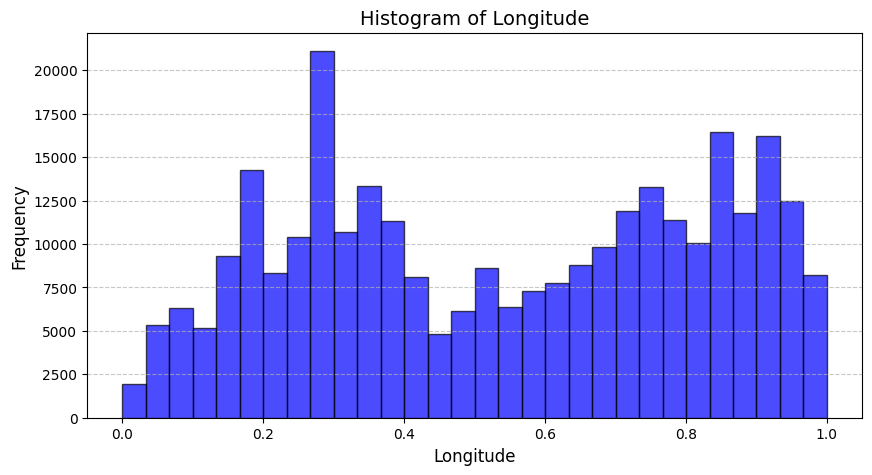

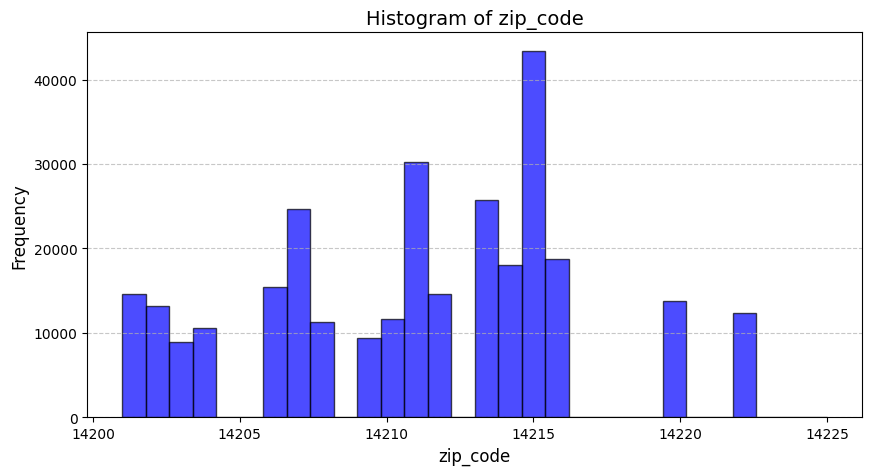

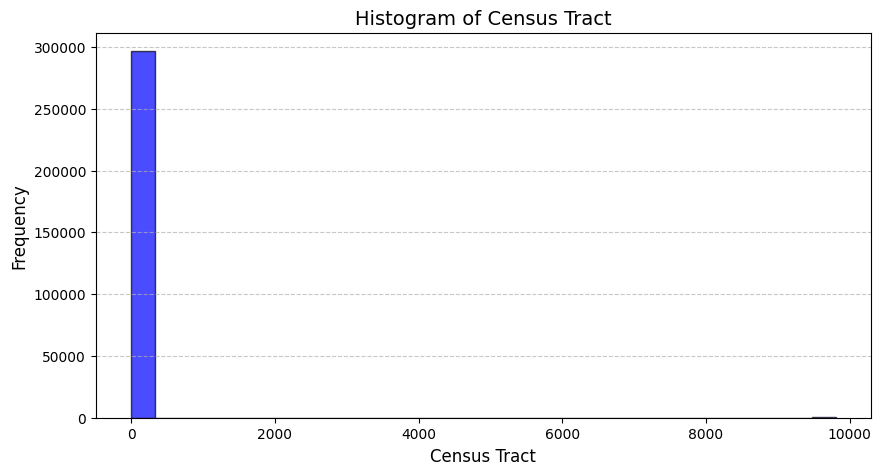

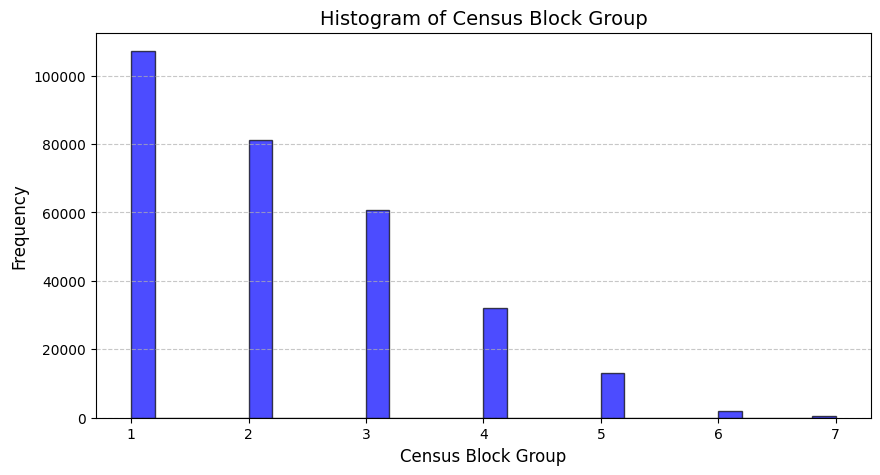

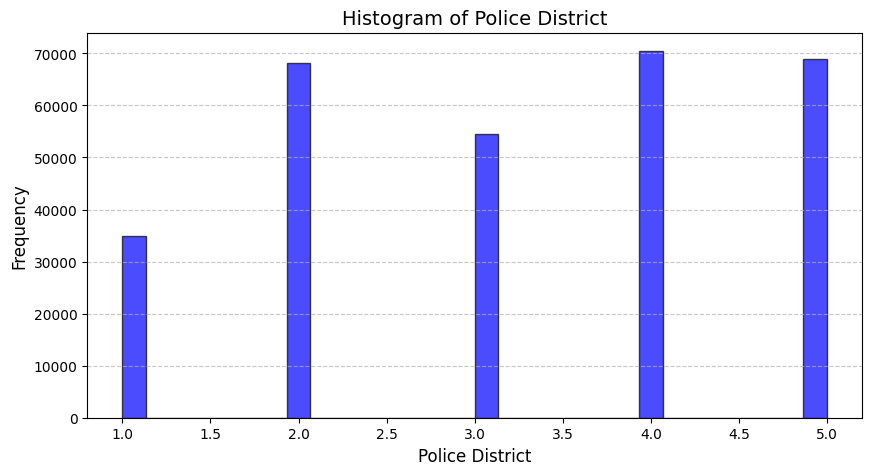

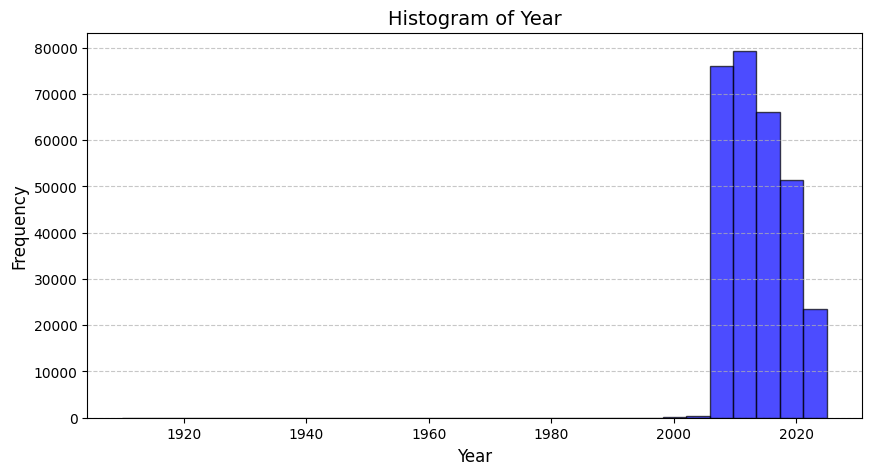

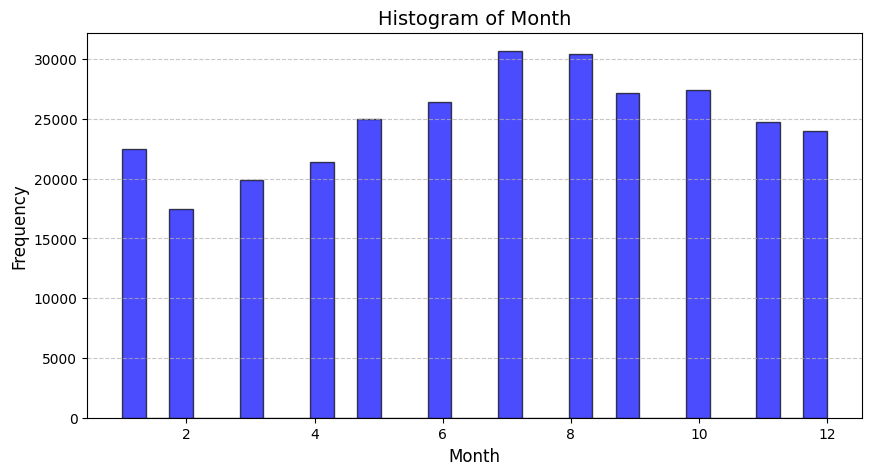

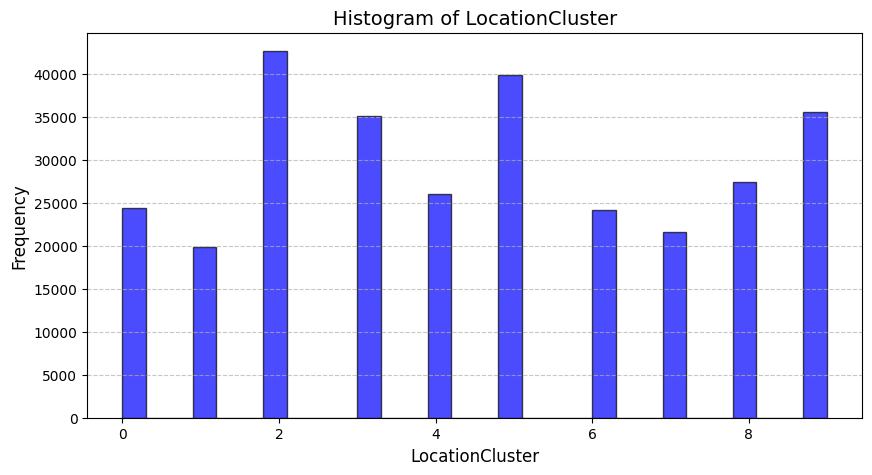

In [43]:

def plot_histograms(dataframe):
    
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    for column in numerical_columns:
        plt.figure(figsize=(10, 5))
        plt.hist(dataframe[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Histogram of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

plot_histograms(df)


In [44]:
#Observation: More data processing

#Census Tract: Extremely skewed with outliers.
#Day of week: This feature might not add much value as it doesn’t vary significantly.

# 1. Creating seasonal feature
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(assign_season)

# Filtering out older data before 2000 if it doesn’t contribute meaningful trends.
# Reason: Older data may not reflect current crime patterns and can add noise.
df = df[df['Year'] >= 2000]

# Removing census block group and census tract
# Reason: These features are skewed and not directly meaningful; they add noise.
df = df.drop(columns=['Census Block Group', 'Census Tract'])

# Grouping zip codes by crime density and convert to categorical
# Reason: High-crime and low-crime areas can be more meaningful than individual zip codes.
def zip_code_density_group(zip_code_counts):
    if zip_code_counts >= 40000:
        return 'High Crime'
    elif zip_code_counts >= 20000:
        return 'Medium Crime'
    else:
        return 'Low Crime'

zip_code_counts = df['zip_code'].value_counts()
df['Crime Density'] = df['zip_code'].map(zip_code_counts).apply(zip_code_density_group)

df = df.drop(columns=['zip_code'])  # Drop the original zip_code column,and address

# 5. Removing day of week - Uniform distribution suggests it doesn’t provide much predictive power.
df = df.drop(columns=['Day of Week','Address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296937 entries, 0 to 318672
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  296937 non-null  object 
 1   Hour of Day            296937 non-null  int64  
 2   Latitude               296937 non-null  float64
 3   Longitude              296937 non-null  float64
 4   neighborhood           296937 non-null  object 
 5   Council District       296937 non-null  object 
 6   2010 Census Tract      296937 non-null  object 
 7   Police District        296937 non-null  int64  
 8   Year                   296937 non-null  int32  
 9   Month                  296937 non-null  int32  
 10  Part of Day            296937 non-null  object 
 11  LocationCluster        296937 non-null  int32  
 12  Season                 296937 non-null  object 
 13  Crime Density          296937 non-null  object 
dtypes: float64(2), int32(3), int64(2), object

In [45]:
df.head()

,Incident Type Primary,Hour of Day,Latitude,Longitude,neighborhood,Council District,2010 Census Tract,Police District,Year,Month,Part of Day,LocationCluster,Season,Crime Density
0,ASSAULT,1,0.797101,0.189189,Grant-Amherst,NORTH,55,4,2016,6,Night,7,Summer,Medium Crime
1,LARCENY/THEFT,5,0.442029,0.909910,Lovejoy,LOVEJOY,23,3,2016,12,Night,3,Winter,Low Crime
3,LARCENY/THEFT,8,0.913043,0.279279,West Hertel,NORTH,56,4,2014,11,Morning,1,Fall,Medium Crime
4,LARCENY/THEFT,10,0.913043,0.279279,West Hertel,NORTH,56,4,2015,4,Morning,1,Spring,Medium Crime
5,BURGLARY,3,0.615942,0.558559,Masten Park,MASTEN,33.02,3,2015,4,Night,8,Spring,Low Crime


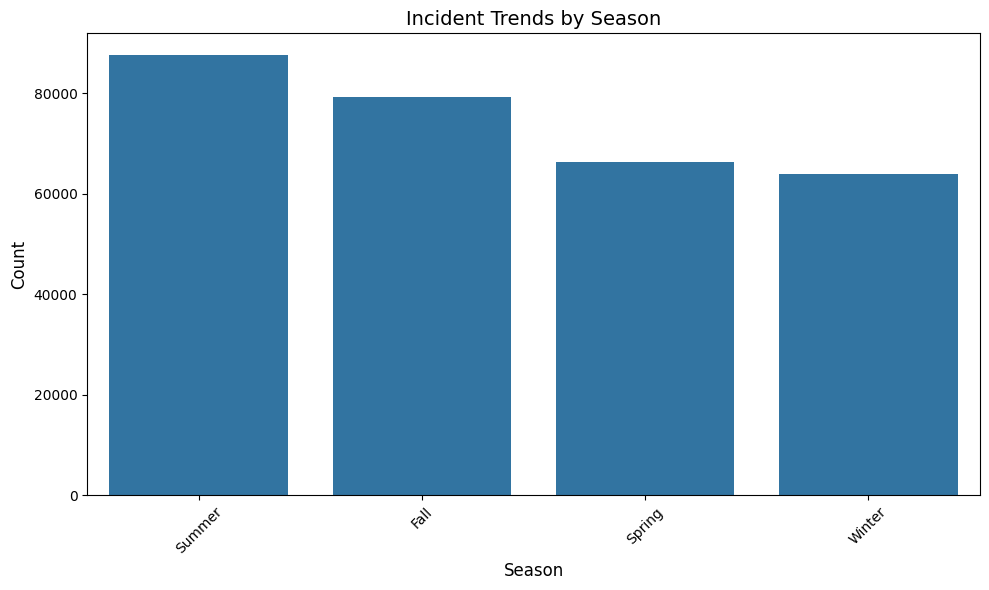

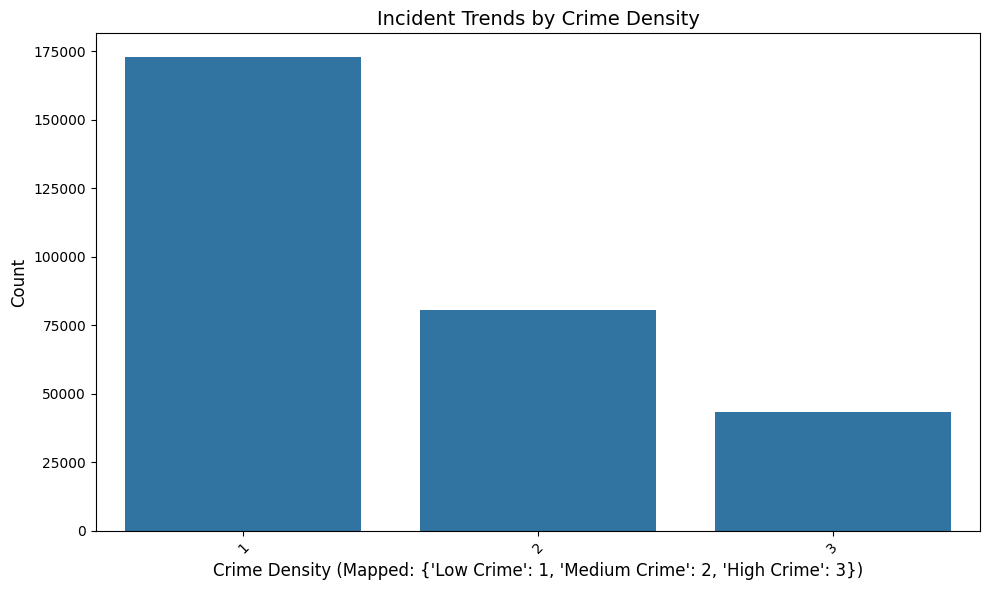

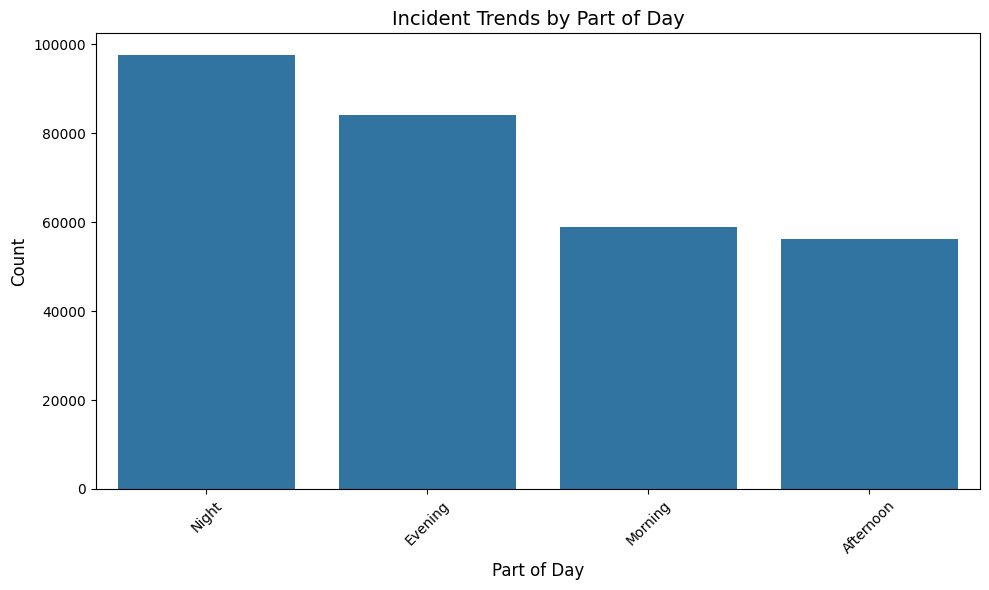

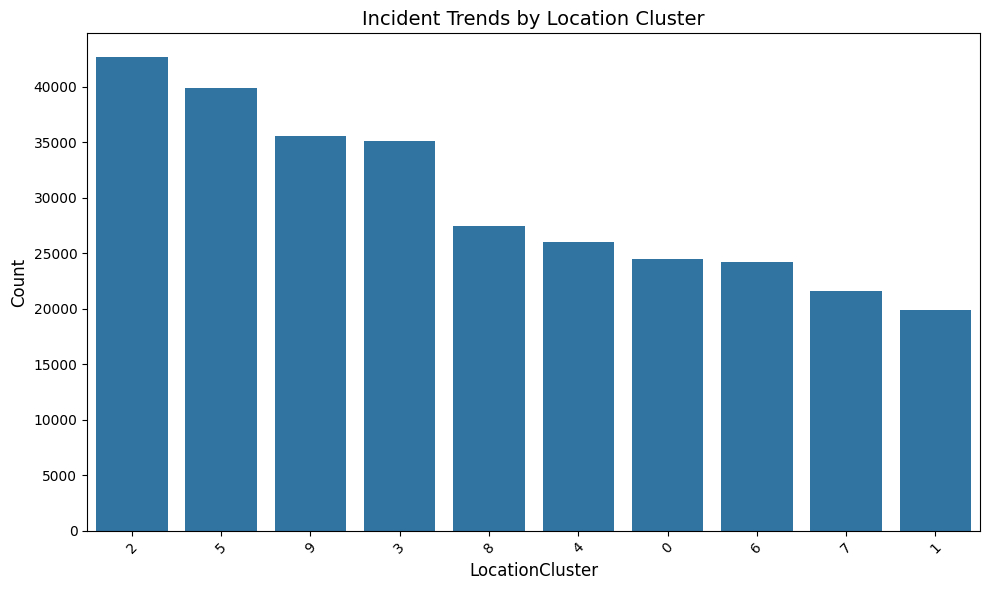

In [46]:

# Function to plot trends for new features
def plot_feature_trends(dataframe, feature, title, category_map=None):
   
    plt.figure(figsize=(10, 6))
    if category_map:
        # Map numbers to names for the x-axis
        dataframe[feature] = dataframe[feature].map(category_map)
        sns.countplot(data=dataframe, x=feature, order=dataframe[feature].value_counts().index)
        plt.xlabel(f"{feature} (Mapped: {category_map})", fontsize=12)
    else:
        sns.countplot(data=dataframe, x=feature, order=dataframe[feature].value_counts().index)
        plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting trends for new features
# 1. Season
plot_feature_trends(df, "Season", "Incident Trends by Season")

# 2. Crime Density (mapping provided for categories)
crime_density_map = {"Low Crime": 1, "Medium Crime": 2, "High Crime": 3}
plot_feature_trends(df, "Crime Density", "Incident Trends by Crime Density", category_map=crime_density_map)

# 3. Part of Day
plot_feature_trends(df, "Part of Day", "Incident Trends by Part of Day")

# 4. Location Cluster
plot_feature_trends(df, "LocationCluster", "Incident Trends by Location Cluster")


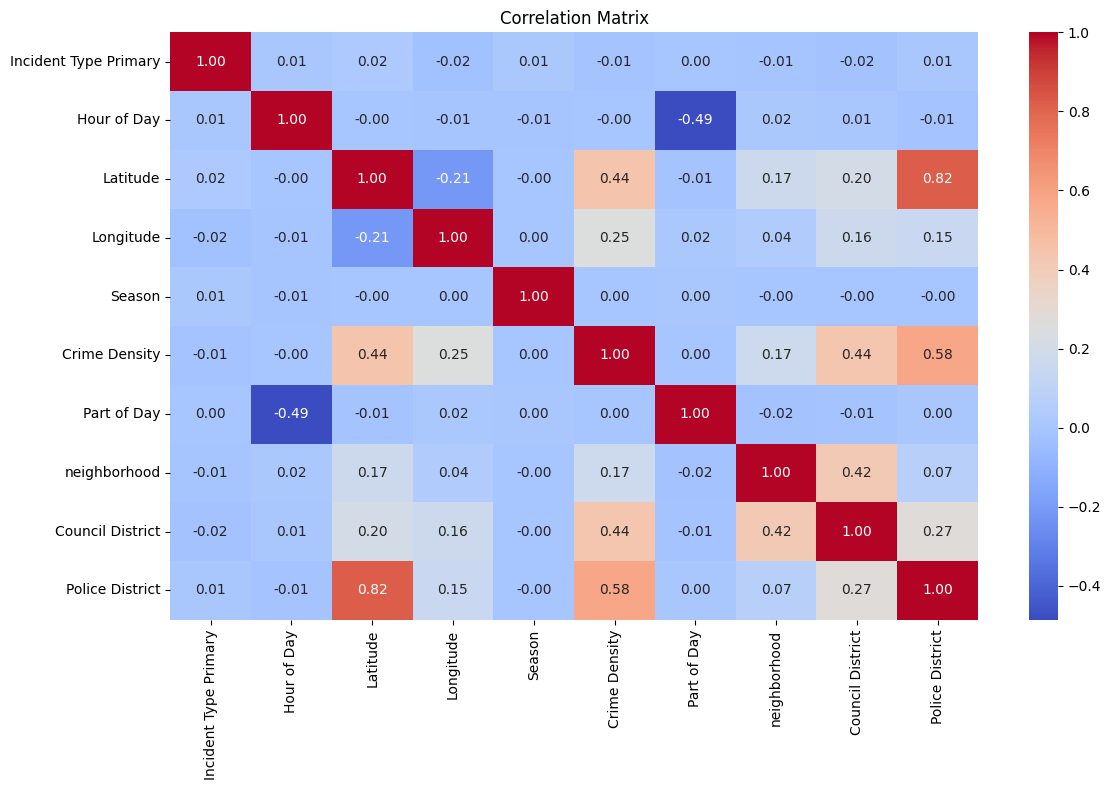

In [47]:
columns_to_include = ['Incident Type Primary', 'Hour of Day', 'Latitude', 'Longitude', 'Season', 
                       'Crime Density', 'Part of Day', 'neighborhood', 'Council District', 'Police District']

correlation_df = df[columns_to_include].copy()

# Convert string variables to categorical codes
categorical_columns = ['Season', 'Crime Density', 'Part of Day', 'neighborhood', 'Council District', 'Police District']
for col in categorical_columns:
    correlation_df[col] = correlation_df[col].astype('category').cat.codes

# Convert target variable to numerical if it's categorical
correlation_df['Incident Type Primary'] = correlation_df['Incident Type Primary'].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296937 entries, 0 to 318672
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Type Primary  296937 non-null  object 
 1   Hour of Day            296937 non-null  int64  
 2   Latitude               296937 non-null  float64
 3   Longitude              296937 non-null  float64
 4   neighborhood           296937 non-null  object 
 5   Council District       296937 non-null  object 
 6   2010 Census Tract      296937 non-null  object 
 7   Police District        296937 non-null  int64  
 8   Year                   296937 non-null  int32  
 9   Month                  296937 non-null  int32  
 10  Part of Day            296937 non-null  object 
 11  LocationCluster        296937 non-null  int32  
 12  Season                 296937 non-null  object 
 13  Crime Density          296937 non-null  int64  
dtypes: float64(2), int32(3), int64(3), object

## Splitting into training/ testing and validation sets

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt

# Encode categorical features
label_encoders = {}
for col in ["neighborhood", "Council District", "Crime Density", "Season"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
features = ["Latitude", "Longitude", "Police District", "Council District", "neighborhood", "Season"]
target = "Crime Density"
X = df[features]
y = df[target]

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (237549, 6), y_train shape: (237549,)
X_validation shape: (29694, 6), y_validation shape: (29694,)
X_test shape: (29694, 6), y_test shape: (29694,)


In [72]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix


In [73]:
# Initializing models 

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.01, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}


In [75]:
# Training and Evaluation

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    loss = log_loss(y_test, y_test_proba)

    results[name] = {
        "accuracy": accuracy,
        "log_loss": loss,
        "train_time": train_time,
        "conf_matrix": confusion_matrix(y_test, y_test_pred)
    }
    
    print(f"Model: {name}")
    print(f"  - Test Accuracy: {accuracy:.4f}")
    print(f"  - Test Loss: {loss:.4f}")
    print(f"  - Training Time: {train_time:.2f} seconds\n")

print("Training and evaluation completed!")


Model: Logistic Regression
  - Test Accuracy: 0.8043
  - Test Loss: 0.5107
  - Training Time: 0.85 seconds

Model: Gradient Boosting
  - Test Accuracy: 0.8744
  - Test Loss: 0.5341
  - Training Time: 13.72 seconds

Model: Naive Bayes
  - Test Accuracy: 0.8161
  - Test Loss: 0.5231
  - Training Time: 0.02 seconds

Training and evaluation completed!


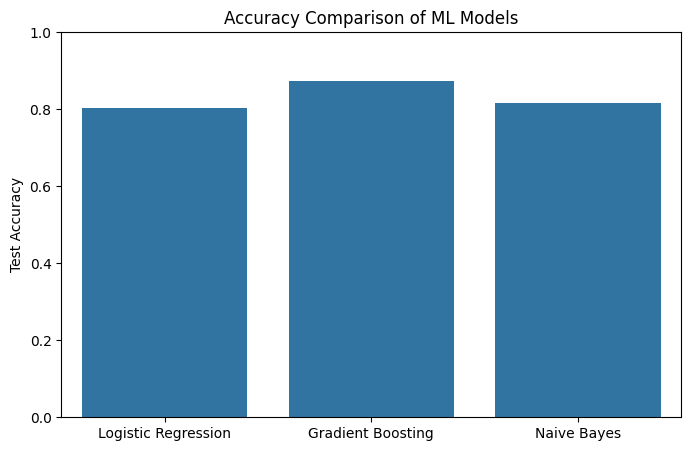

In [53]:
# Plotting accuracy comparison

model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel("Test Accuracy")
plt.title("Accuracy Comparison of ML Models")
plt.ylim(0, 1)
plt.show()


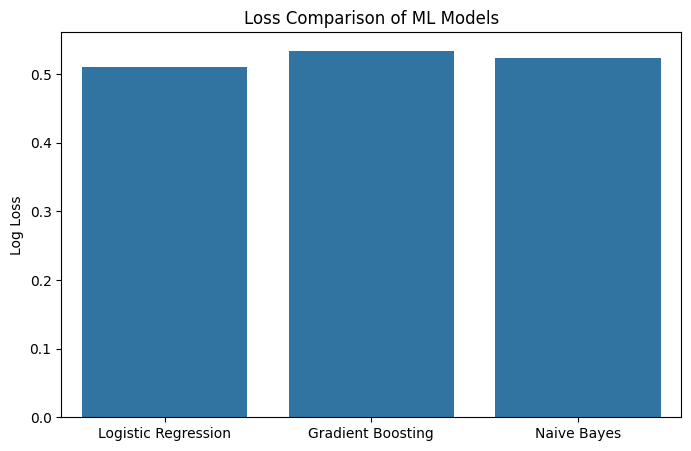

In [54]:
# Plotting log loss comparison

losses = [results[m]["log_loss"] for m in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=losses)
plt.ylabel("Log Loss")
plt.title("Loss Comparison of ML Models")
plt.show()


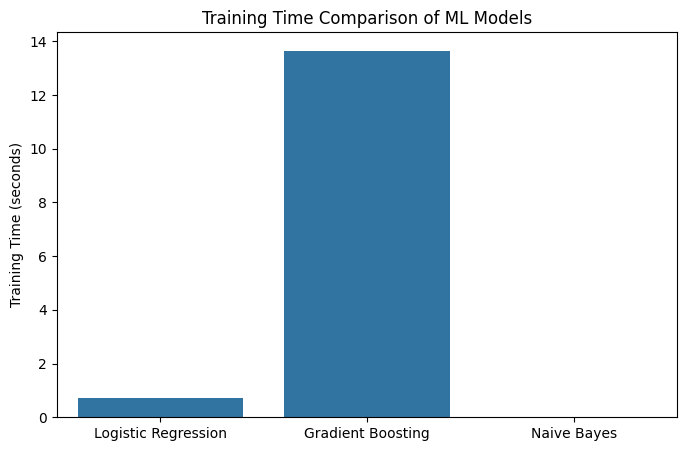

In [55]:
# Plotting training time comparison

times = [results[m]["train_time"] for m in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=times)
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison of ML Models")
plt.show()


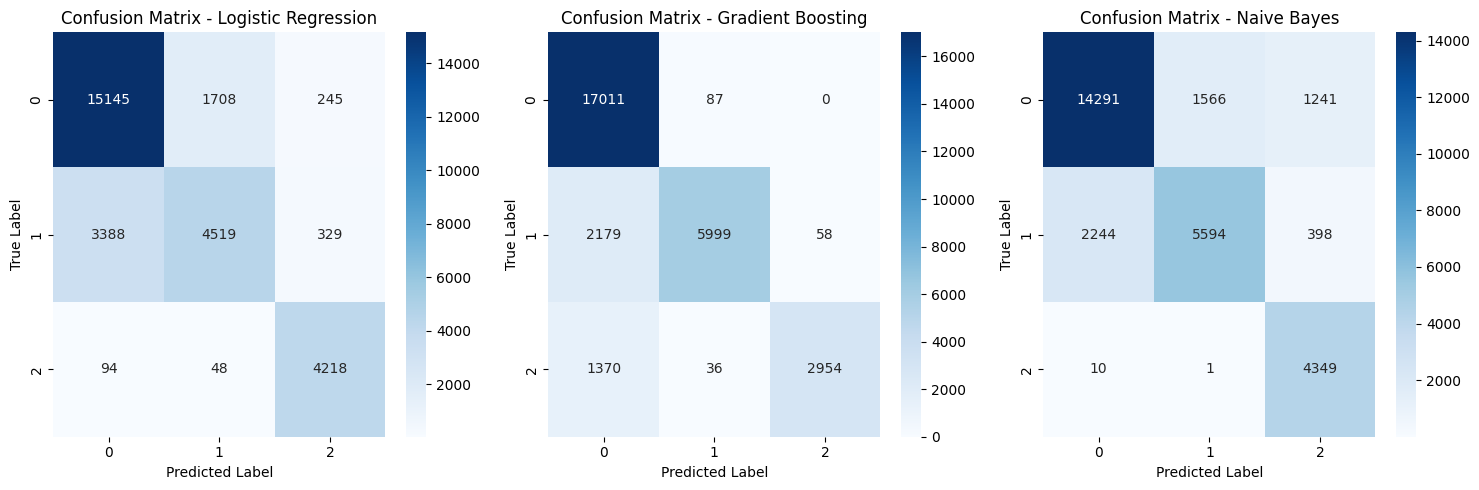

In [56]:
# Plotting confusion matrices

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, name in enumerate(model_names):
    sns.heatmap(results[name]["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [64]:
# NN implementation
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_validation_tensor = torch.tensor(X_validation_scaled, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create PyTorch dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(p=0.4)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        output = F.softmax(self.fc3(x), dim=1)
        return output

input_size = X_train_scaled.shape[1]
hidden_size = 64 
output_size = len(y.unique())

# Instantiating the model
model = Net(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

# Model Traning
epochs = 20
train_losses = []
validation_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Evaluating on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_validation_tensor)
        val_loss = criterion(val_outputs, y_validation_tensor)
        validation_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {validation_losses[-1]:.4f}")

# Evaluating the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_accuracy = accuracy_score(y_test, test_predictions.numpy())
    test_loss = criterion(test_outputs, y_test_tensor)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss.item():.4f}")


Epoch 1/20, Training Loss: 0.6497, Validation Loss: 0.6168
Epoch 2/20, Training Loss: 0.6462, Validation Loss: 0.6213
Epoch 3/20, Training Loss: 0.6545, Validation Loss: 0.6308
Epoch 4/20, Training Loss: 0.6600, Validation Loss: 0.6527
Epoch 5/20, Training Loss: 0.6561, Validation Loss: 0.6364
Epoch 6/20, Training Loss: 0.6627, Validation Loss: 0.6749
Epoch 7/20, Training Loss: 0.6607, Validation Loss: 0.6253
Epoch 8/20, Training Loss: 0.6585, Validation Loss: 0.6520
Epoch 9/20, Training Loss: 0.6549, Validation Loss: 0.6239
Epoch 10/20, Training Loss: 0.6528, Validation Loss: 0.6424
Epoch 11/20, Training Loss: 0.6557, Validation Loss: 0.6271
Epoch 12/20, Training Loss: 0.6435, Validation Loss: 0.6176
Epoch 13/20, Training Loss: 0.6445, Validation Loss: 0.6292
Epoch 14/20, Training Loss: 0.6453, Validation Loss: 0.6305
Epoch 15/20, Training Loss: 0.6398, Validation Loss: 0.6143
Epoch 16/20, Training Loss: 0.6392, Validation Loss: 0.6050
Epoch 17/20, Training Loss: 0.6463, Validation Lo

In [65]:
from sklearn.metrics import confusion_matrix

results["Neural Network"] = {
    "accuracy": test_accuracy,  
    "log_loss": test_loss.item(),  
    "conf_matrix": confusion_matrix(y_test, test_predictions.numpy())
}


/var/folders/_n/nbbzbnm13nq3c6fcgjjfr8y00000gn/T/ipykernel_39159/3621674775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Blues")


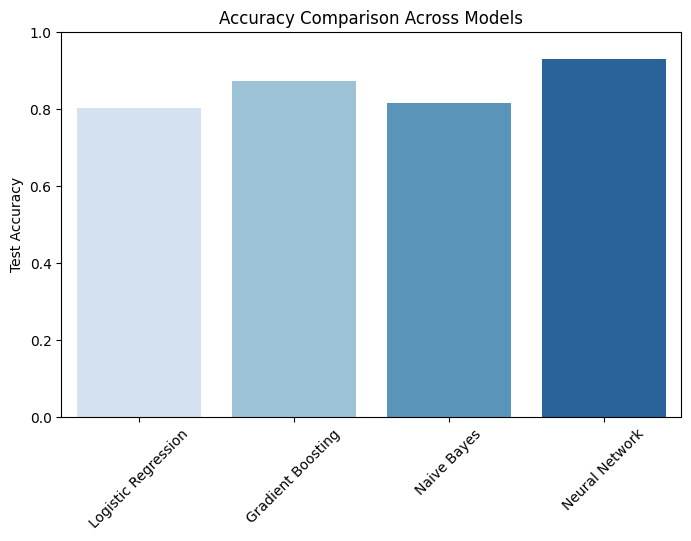

In [66]:

model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="Blues")
plt.ylabel("Test Accuracy")
plt.title("Accuracy Comparison Across Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


/var/folders/_n/nbbzbnm13nq3c6fcgjjfr8y00000gn/T/ipykernel_39159/2964819580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=losses, palette="Reds")


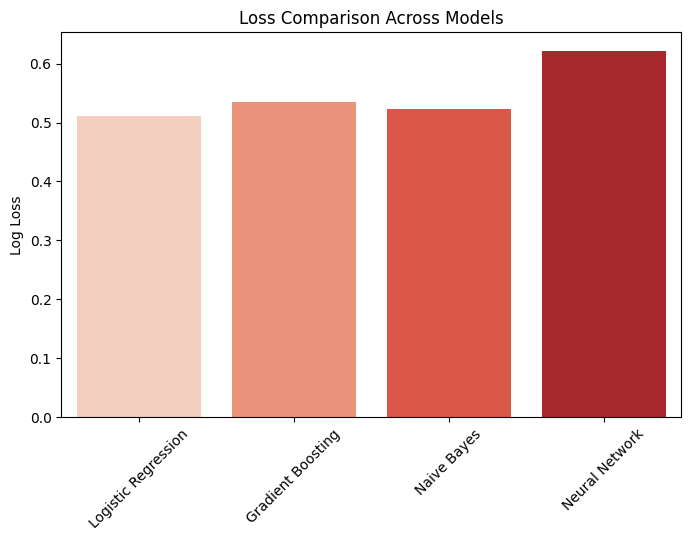

In [67]:
# Extracting log loss values
losses = [results[m]["log_loss"] for m in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=losses, palette="Reds")
plt.ylabel("Log Loss")
plt.title("Loss Comparison Across Models")
plt.xticks(rotation=45)
plt.show()


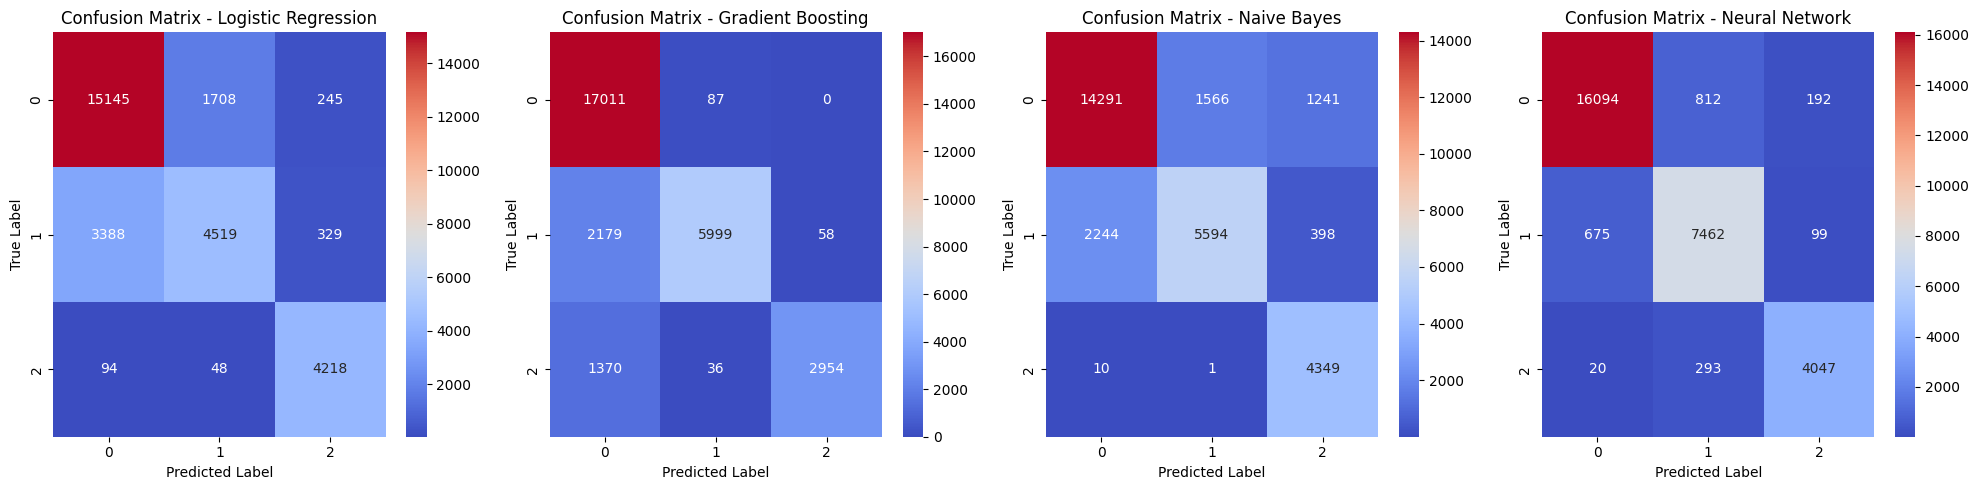

In [68]:
# Ploting all Confusion Matrices
fig, axes = plt.subplots(1, len(model_names), figsize=(20, 5))

for i, name in enumerate(model_names):
    sns.heatmap(results[name]["conf_matrix"], annot=True, fmt="d", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [69]:
# Save the model's state dictionary (weights)
torch.save(model.state_dict(), "a0_part_2_yavarkha.pt")